# Lagrange Interpolation

## Problem Statement

**Lagrange polynomial interpolation** finds a single polynomial that goes through all the data points. This polynomial is referred to as a **Lagrange polynomial**, \( L(x) \), and as an interpolation function it should satisfy

$$
L(x_i) = y_i
$$

for every point in the data set.

For computing Lagrange polynomials, it is useful to write them as a linear combination of **Lagrange basis polynomials**, \( P_i(x) \), where:

$$
P_i(x) =
\prod_{\substack{j = 1 \\ j \ne i}}^{n}
\frac{x - x_j}{x_i - x_j}
$$


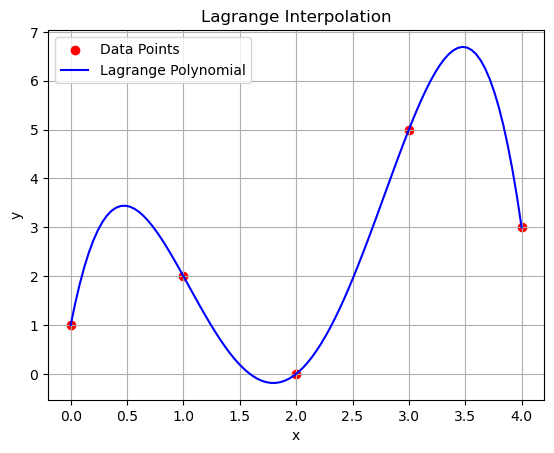

In [1]:
# Example: Interpolation Problem 1 (Lagrange Interpolation)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Given data points
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 0, 5, 3])

# Create the Lagrange polynomial
polynomial = lagrange(x, y)

# Generate points for plotting the polynomial
x_plot = np.linspace(min(x), max(x), 100)
y_plot = polynomial(x_plot)

# Plot the original data points and the Lagrange polynomial
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_plot, y_plot, color='blue', label='Lagrange Polynomial')
plt.title('Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# YOU TRY! Interpolate the value at x = 2.5 using the Lagrange polynomial
x_interp = 2.5
y_interp = polynomial(x_interp)
print(f"The interpolated value at x = {x_interp} is y = {y_interp}")

# Plot the interpolated point (enter code here)

The interpolated value at x = 2.5 is y = 1.9374999999999822


# Newton's Method

Newton’s polynomial interpolation is another popular way to fit exactly for a set of $n-1$ data points, where:

$$
f(x) = a_0 + a_1(x-x_0)+a_2(x-x_1)(x-x_0) + . . . + a_n(x-x_0)(x-x_1). . .(x-x_{n})
$$

More formally, we can write each coefficient as **divided differences**. 

$$
a_0 = y_0 \\
\\
a_1 = \frac{f(x_1)-f(x_0)}{x_1-x_0} \\
\\
a_2 = \frac{(\frac{f(x_2)-f(x_1)}{x_2-x_1}-\frac{f(x_1)-f(x_0)}{x_1-x_0})}{x_2-x_0} \\
$$

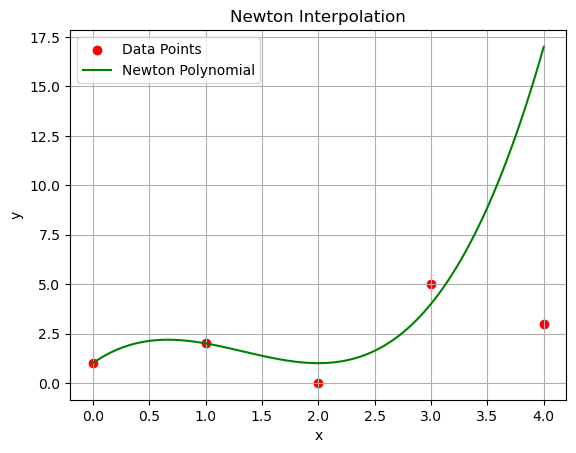

In [2]:
# Example: Newton's Method for Interpolation
import numpy as np
import matplotlib.pyplot as plt

# Data points
x_newton = np.array([0, 1, 2, 3, 4])
y_newton = np.array([1, 2, 0, 5, 3])

# Create the Newton polynomial
def divided_differences(x, y):
    n = len(x)
    coef = np.copy(y)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i - 1]) / (x[i] - x[i - j])
    return coef

def newton_polynomial(coef, x_data, x):
    n = len(coef)
    p = coef[0]
    for k in range(1, n):
        term = coef[k]
        for j in range(k):
            term *= (x - x_data[j])
        p += term
    return p

# Calculate coefficients for Newton's polynomial
coef = divided_differences(x_newton, y_newton)

# Generate points for plotting the Newton polynomial
x_plot_newton = np.linspace(min(x_newton), max(x_newton), 100)
y_plot_newton = [newton_polynomial(coef, x_newton, xi) for xi in x_plot_newton]

# Plot the original data points and the Newton polynomial
plt.scatter(x_newton, y_newton, color='red', label='Data Points')
plt.plot(x_plot_newton, y_plot_newton, color='green', label='Newton Polynomial')
plt.title('Newton Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Example 2: 

import numpy as np
import matplotlib.pyplot as plt

def divided_diff():
    n = len(y) # Number of points
    coef = np.zeros([n, n])
    coef[:, 0] = y # First column is y

    for i in range(1, n):
        for j in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1])/(x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k]+(x-x[n-k])*p
    return p

x = np.array([-1,0,1,2])
y = np.array([3,-4,5,6])

divided_diffs = divided_diff(x,y)[0, :]

# Evaluate new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(divided_diffs, x, x_new)

plt.figure(figsize = (10,8))
plt.plot(x,y, 'ro')
plt.plot(x_new, y_new, 'b')
plt.show()